In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Updload dataset and visualize first 5 rows
raw_data = pd.read_csv('Traffic.csv')
raw_data.head(5)

,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
0,2010,Zona urbana,25/01/2010,SE,999999.0,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,99.9,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,07/05/2010,SE,999999.0,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div


In [4]:
# Analize content as nans, cols info

columns_name = raw_data.columns.values

print(f'The columns from the Traffic dataset are {columns_name}')

raw_data.info()

The columns from the Traffic dataset are ['Year' 'Area' 'Date ' 'Road ' 'Kilometer Point' 'Municipality Name '
 'County Name ' 'Province Name ' 'Fatalties' 'Serious Injuries '
 'Light Injuries ' 'Total Victims ' 'Units Involved '
 'Pedestrains Involved' 'Bicycles Involved' 'Mopeds Involved'
 'Motorcycles' 'Light Vehicles Involved ' 'Heavy Vehicles Involved'
 'Other Units Involved' 'Unspecified Units Involved' 'Road Speed Limit'
 'Accident with Hit and Run' 'Fog Presence ' 'Surrounding Environment'
 'Special Lane Presence' 'Special Traffic Measures' 'Weather Conditions '
 'Special Road Functions ' 'Severity of Accident ' 'Influence of Fog '
 'Influence of Environment' 'Influence of Traffic' 'Influence of Weather'
 'Influence of Wind Intensity ' 'Influence of Lighting'
 'Influence of Special Measures' 'Influence of Road Objects'
 'Influence of Road Surface ' 'Influence of Visibility '
 'Intersection Characteristics ' 'Speed Limit Information'
 'Lighting Conditions ' 'Traffic Regulation a

In [5]:
# General Trends
# What are the overall trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010-2021?

# Columns Names that we will use: 'Year', 'Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims '

accidents = raw_data[['Year','Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims ']].groupby('Year').sum()

accidents.head(5)

,Fatalties,Serious Injuries,Light Injuries,Total Victims
Year,,,,
2010,339,2007,883,3229
2011,280,1866,757,2903
2012,274,1980,879,3133
2013,232,1901,752,2885
2014,230,1888,760,2878


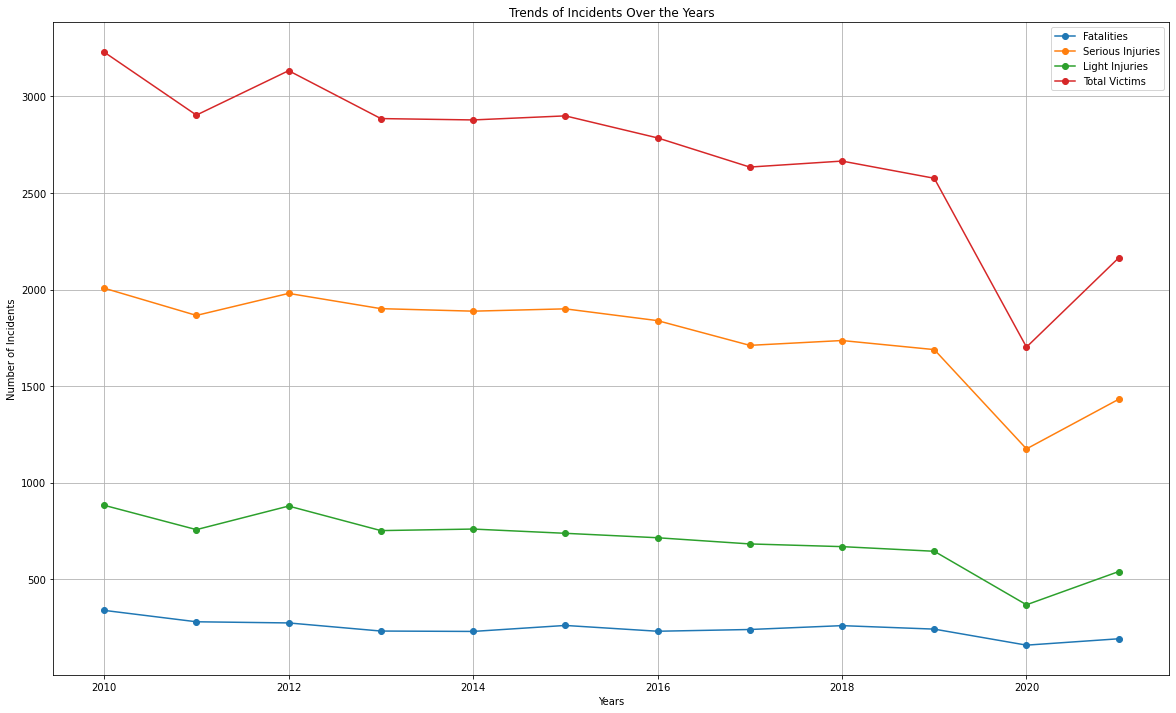

In [6]:
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

# Plotting each trend
plt.plot(accidents.index, accidents['Fatalties'], label='Fatalities', marker='o')
plt.plot(accidents.index, accidents['Serious Injuries '], label='Serious Injuries', marker='o')
plt.plot(accidents.index, accidents['Light Injuries '], label='Light Injuries', marker='o')
plt.plot(accidents.index, accidents['Total Victims '], label='Total Victims', marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Number of Incidents')
plt.title('Trends of Incidents Over the Years')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [26]:
"""
The trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010 to 2021 
indicate a consistent overall downward trajectory, suggesting improvements in road safety measures
or changes in driving behavior. Notably, the year 2020 stands out with a significant decrease, 
attributed to the impact of the COVID-19 pandemic and associated quarantine measures. Fatalities 
exhibit a more linear decline, possibly influenced by advancements in car safety systems. However, 
the slower decrease in fatalities compared to other indicators hints at a shift, where incidents that
might have resulted in fatalities are now being categorized as injuries, reflecting the evolution of 
safety technology. Overall, the data underscores positive advancements in road safety, though the exceptional
circumstances of 2020 should be considered when assessing the trends.
"""

'\n\nThe trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010 to 2021 \nindicate a consistent overall downward trajectory, suggesting improvements in road safety measures\nor changes in driving behavior. Notably, the year 2020 stands out with a significant decrease, \nattributed to the impact of the COVID-19 pandemic and associated quarantine measures. Fatalities \nexhibit a more linear decline, possibly influenced by advancements in car safety systems. However, \nthe slower decrease in fatalities compared to other indicators hints at a shift, where incidents that\nmight have resulted in fatalities are now being categorized as injuries, reflecting the evolution of \nsafety technology. Overall, the data underscores positive advancements in road safety, though the exceptional\ncircumstances of 2020 should be considered when assessing the trends.\n'

In [9]:
# Accidents Characteristics
# What common characteristics (time of day, type of road, etc.) are observed in the most severe accidents?

# We assume that the most severe accidents are those ones where the Severity shows fatality, since
# a fatality might be considered the worst outcome from an accident

most_severe_accidents = raw_data[raw_data['Severity of Accident '] == 'Accident mortal']
most_severe_accidents.head(3)

,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
2,2010,Carretera,17/05/2010,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
7,2010,Zona urbana,23/10/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,1,0,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,10.55,Matí,Atropellament,dis
18,2010,Zona urbana,02/07/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,1,0,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,16.40,Tarda,Atropellament,div


In [33]:
#- Col names: 
columns_severity = ['Date ', 'Units Involved ', 'Weather Conditions ',
'Type of Road', 'Road Speed Limit', 'Road Ownership ',
 'Wind Conditions ', 'Lighting Conditions ', 'Day of the Week Grouping ',
 'Hour of Day', 'Time of Day Grouping ', 'Type of Accident ',
 'Day Type']

raw_data['Date '] = pd.to_datetime(raw_data['Date '], format='%d/%m/%Y', dayfirst=True)
characteristics_msa = raw_data[columns_severity]
#characteristics_msa['Date '] = pd.to_datetime(characteristics_msa['Date '], format='%d/%m/%y')
characteristics_msa['Day of Week'] = characteristics_msa['Date '].dt.day_name()
characteristics_msa['Month'] = characteristics_msa['Date '].dt.month_name()

characteristics_msa.head(5)

C:\Users\marcl\AppData\Local\Temp\ipykernel_12784\451092251.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characteristics_msa['Day of Week'] = characteristics_msa['Date '].dt.day_name()
C:\Users\marcl\AppData\Local\Temp\ipykernel_12784\451092251.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characteristics_msa['Month'] = characteristics_msa['Date '].dt.month_name()


,Date,Units Involved,Weather Conditions,Type of Road,Road Speed Limit,Road Ownership,Wind Conditions,Lighting Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type,Day of Week,Month
0,2010-01-25,2,Bon temps,Via urbana( inclou carrer i carrer residencial),100.0,NaN,"Calma, vent molt suau","De nit, il·luminació artificial suficient",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij,Monday,January
1,2010-10-31,1,Bon temps,Carretera convencional,40.0,Estatal,"Calma, vent molt suau","De nit, il·luminació artificial suficient",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg,Sunday,October
2,2010-05-17,4,Bon temps,Carretera convencional,80.0,Estatal,"Calma, vent molt suau","De dia, dia clar",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij,Monday,May
3,2010-08-21,2,Bon temps,Via urbana( inclou carrer i carrer residencial),100.0,NaN,"Calma, vent molt suau","De nit, il·luminació artificial suficient",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis,Saturday,August
4,2010-05-07,1,Bon temps,Via urbana( inclou carrer i carrer residencial),100.0,NaN,"Calma, vent molt suau","De dia, dia clar",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div,Friday,May


In [80]:
units_involved = characteristics_msa.groupby('Units Involved ').size().reset_index(name='Events Count')
weather = characteristics_msa.groupby('Weather Conditions ').size().reset_index(name='Events Count')
road = characteristics_msa.groupby('Type of Road').size().reset_index(name='Events Count')
speed = characteristics_msa.groupby('Road Speed Limit').size().reset_index(name='Events Count')
owner = characteristics_msa.groupby('Road Ownership ').size().reset_index(name='Events Count')
light = characteristics_msa.groupby('Lighting Conditions ').size().reset_index(name='Events Count')
dow_grouping = characteristics_msa.groupby('Day of the Week Grouping ').size().reset_index(name='Events Count')
time = characteristics_msa.groupby('Time of Day Grouping ').size().reset_index(name='Events Count')
type_of_accident = characteristics_msa.groupby('Type of Accident ').size().reset_index(name='Events Count')
day = characteristics_msa.groupby('Day of Week').size().reset_index(name='Events Count')
month = characteristics_msa.groupby('Month').size().reset_index(name='Events Count')



In [82]:
time_order = ['Matí', 'Tarda', 'Nit']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

time['Time of Day Grouping '] = pd.Categorical(time['Time of Day Grouping '], categories=time_order, ordered=True)
time.sort_values(by='Time of Day Grouping ', inplace=True)

day['Day of Week'] = pd.Categorical(day['Day of Week'], categories=day_order, ordered=True)
day.sort_values(by='Day of Week', inplace=True)

month['Month'] = pd.Categorical(month['Month'], categories=month_order, ordered=True)
month.sort_values(by='Month', inplace=True)

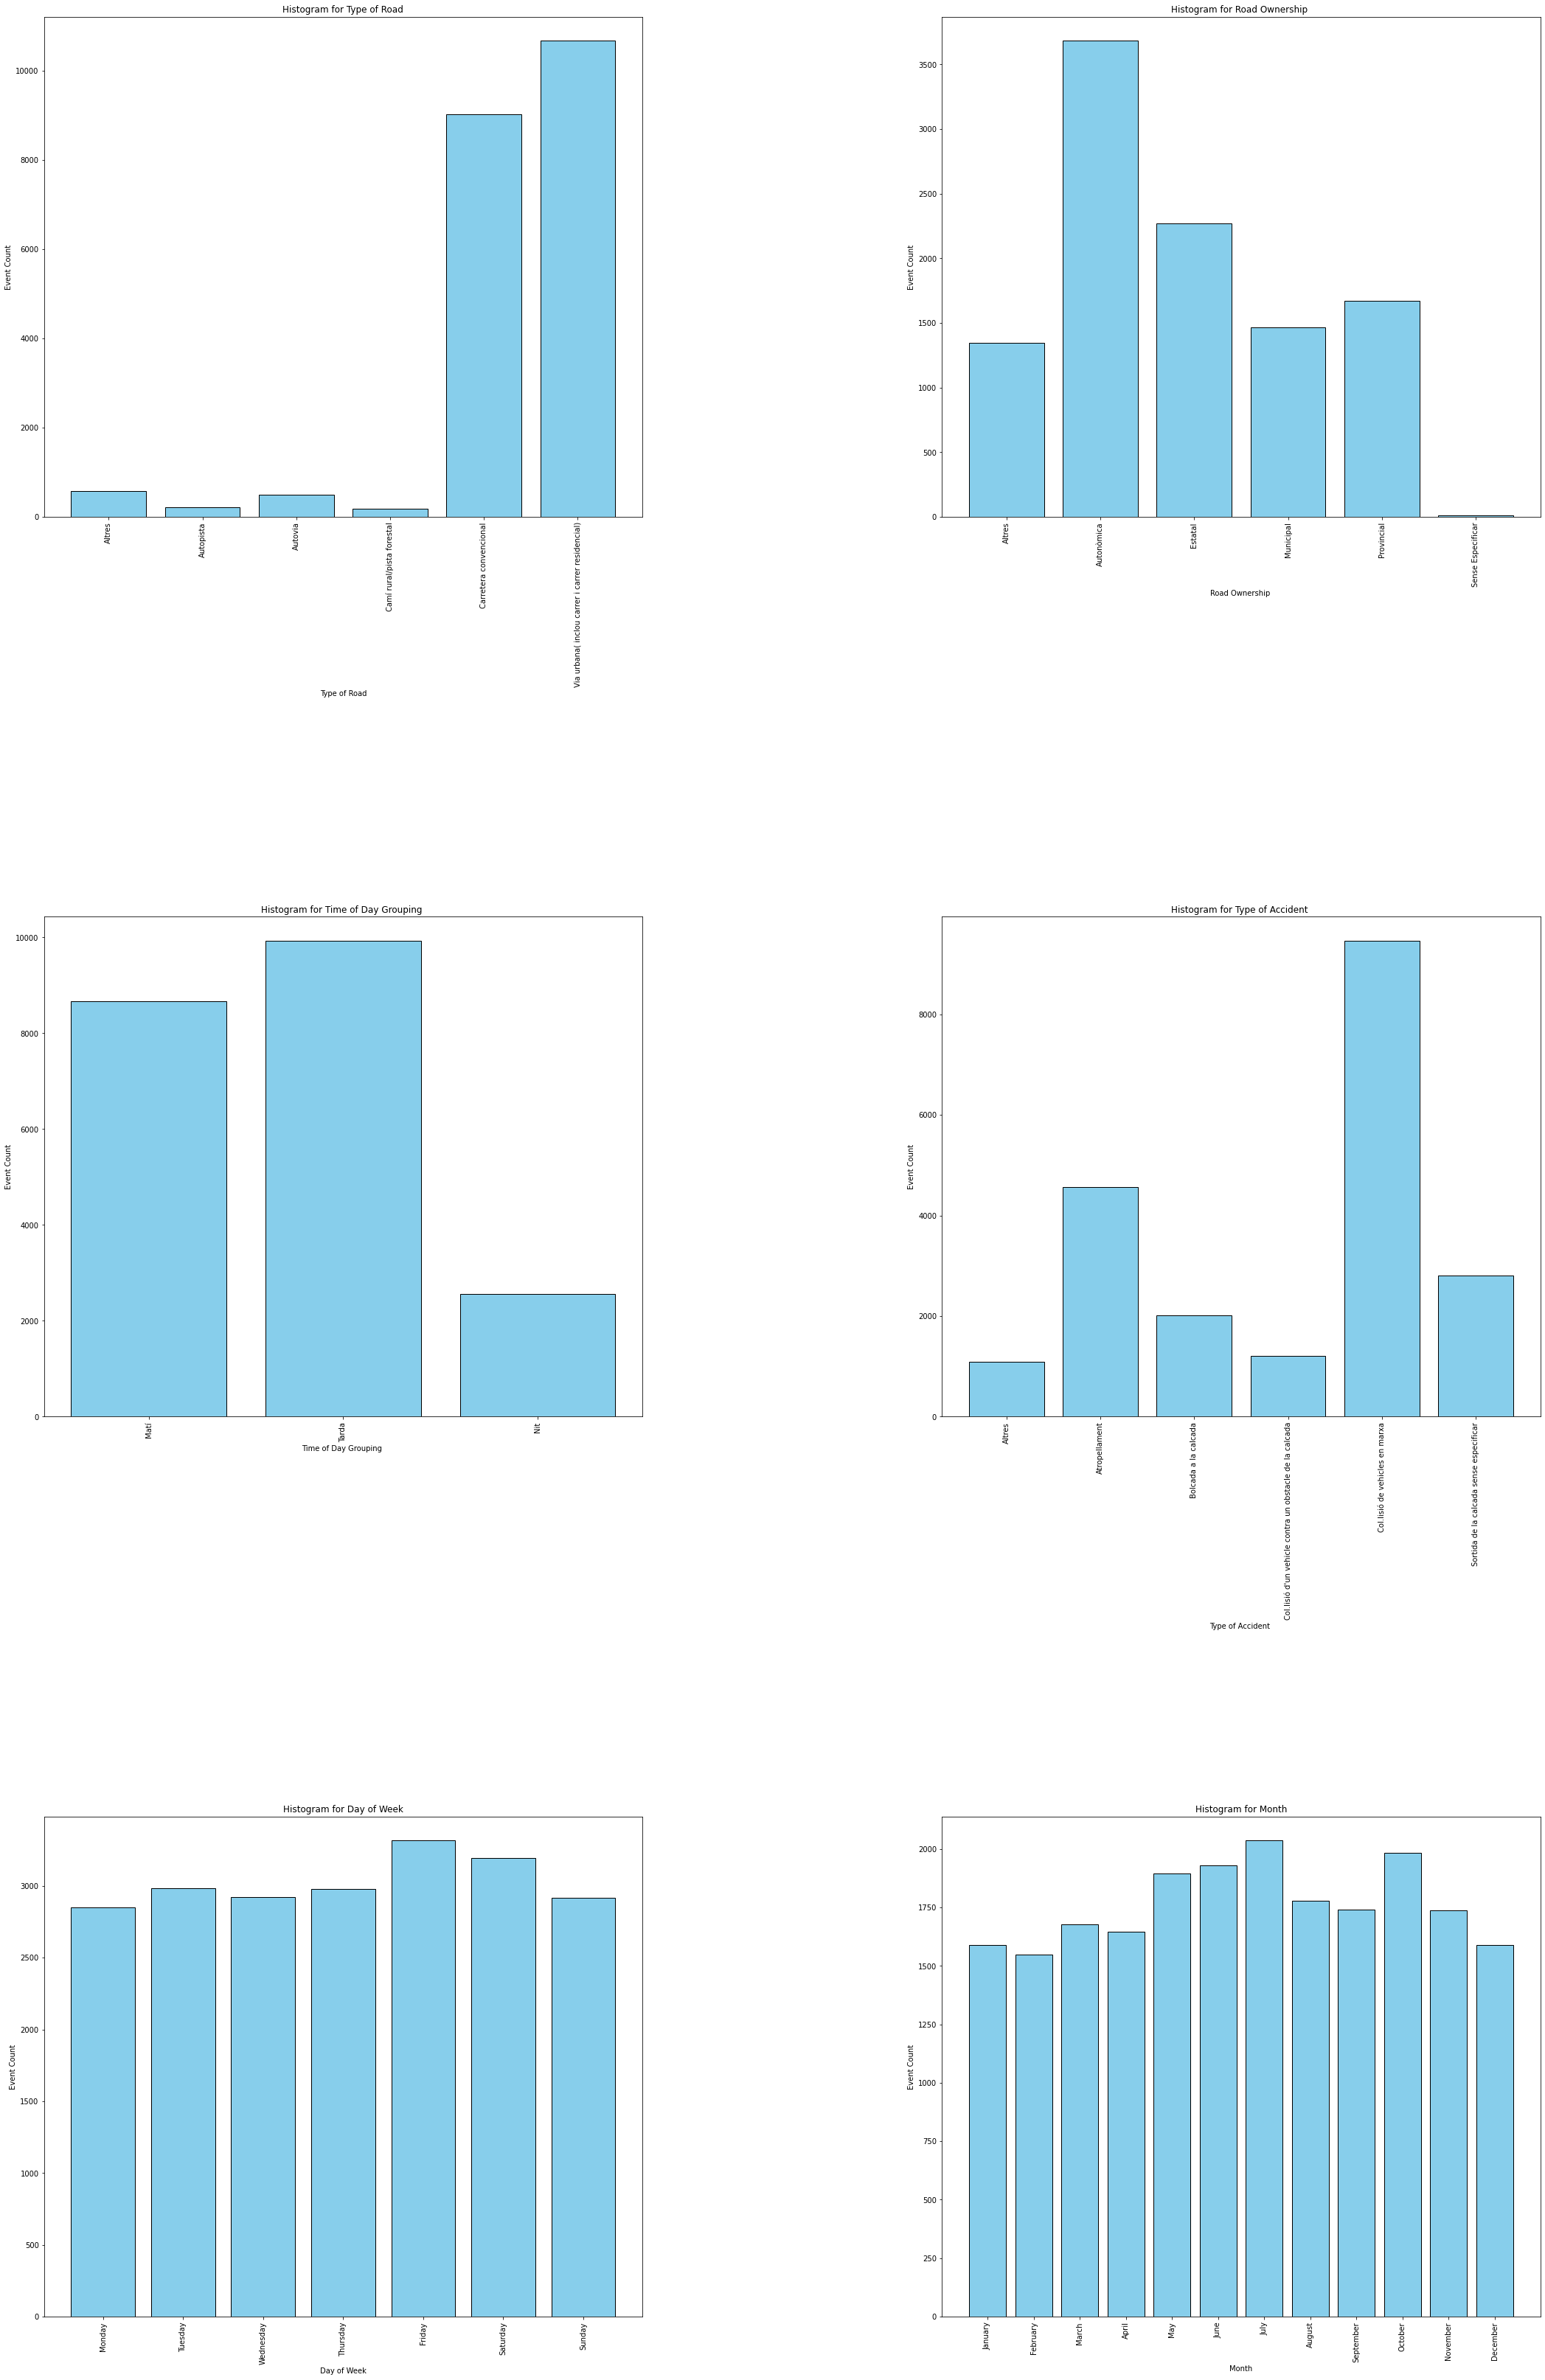

In [98]:
grouped_datasets = [road, owner, time, 
                    type_of_accident, day, month]
column_names = ['Type of Road', 'Road Ownership ', 'Time of Day Grouping ',
                'Type of Accident ', 'Day of Week', 'Month']


# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 45))
fig.tight_layout(pad=5.0)

# Loop through datasets and column names to create histograms
for ax, dataset, column_name in zip(axes.flatten(), grouped_datasets, column_names):
    # Convert 'Month' to a categorical data type with the custom order

    # Plotting histogram
    ax.bar(dataset[column_name], dataset['Events Count'], color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Event Count')

    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

In [3]:
#3. Geographical Insights
# Which municipalities or counties in Catalonia have the highest incidence of traffic accidents? 
# How does this correlate with population density or road network characteristics?
geo_columns = ['Municipality Name ', 'County Name ', 'Province Name ']
road_columns = ['Road Speed Limit', 'Type of Road', 'Total Victims ']

columns_3 = geo_columns+road_columns

geographical_data = raw_data[columns_3]

muncipalities = geographical_data.groupby('Municipality Name ').size().reset_index(name='Accidents')
counties = geographical_data.groupby('County Name ').size().reset_index(name='Accidents')
province = geographical_data.groupby('Province Name ').size().reset_index(name='Accidents')

top_3_municipalities = muncipalities.sort_values(by='Accidents', ascending=False)[:3]
top_3_counties = counties.sort_values(by='Accidents', ascending=False)[:3]
top_3_province = province.sort_values(by='Accidents', ascending=False)[:3]



In [106]:
province_data = {'Province Name ': ['Barcelona', 'Girona', 'Tarragona', 'Lleida'],
                 'Population Density': [739.6, 133.2, 130.4, 36.1]}
provice_densities = pd.DataFrame(data=province_data)
muncipalities_densities = pd.read_csv('municipalities.csv', sep=";")
counties_densities = pd.read_csv('counties.csv')


In [107]:
muncipalities['Municipality Name '] = muncipalities['Municipality Name '].str.lower()
muncipalities_densities['Municipality Name '] = muncipalities_densities['Municipality Name '].str.lower()
muncipalities_densities['Population Density'] = muncipalities_densities['Population Density'].str.replace(',', '.').astype(float)

municipalities_corr = pd.merge(muncipalities, muncipalities_densities, on='Municipality Name ')
counties_corr = pd.merge(counties, counties_densities, on='County Name ')
province_corr = pd.merge(province, provice_densities, on='Province Name ')

municipalities_corr.sort_values(by='Accidents', ascending=False, inplace=True)
counties_corr.sort_values(by='Accidents', ascending=False, inplace=True)
province_corr.sort_values(by='Accidents', ascending=False, inplace=True)

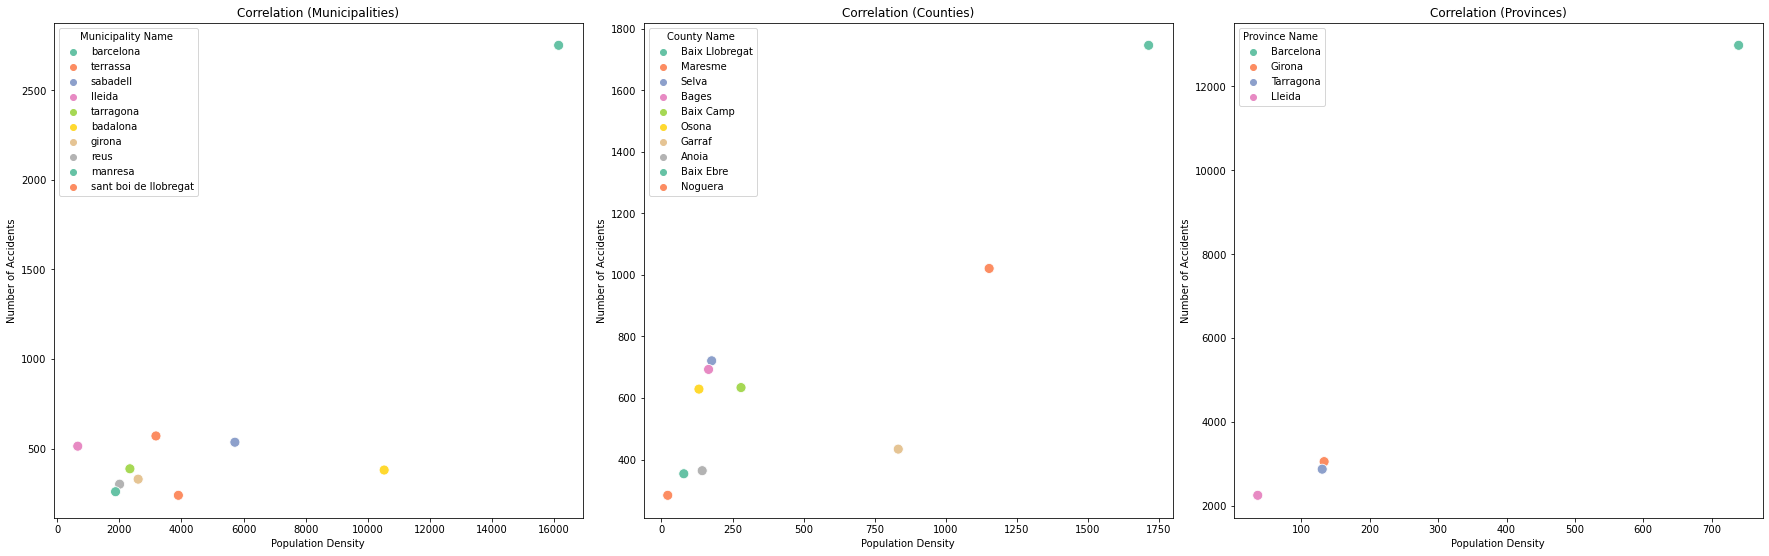

In [108]:

# List of datasets and their names
datasets = [municipalities_corr[:10], counties_corr[:10], province_corr]
dataset_names = ['Municipalities', 'Counties', 'Provinces']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
fig.tight_layout(pad=3.0)

# Loop through datasets and dataset names to create scatter plots
for ax, dataset, dataset_name in zip(axes, datasets, dataset_names):
    # Plotting the scatter plot
    sns.scatterplot(x='Population Density', y='Accidents', data=dataset, ax=ax, hue=dataset.columns[0], palette='Set2', s=100)
    ax.set_title(f'Correlation ({dataset_name})')
    ax.set_xlabel('Population Density')
    ax.set_ylabel('Number of Accidents')

# Show the plot
plt.show()

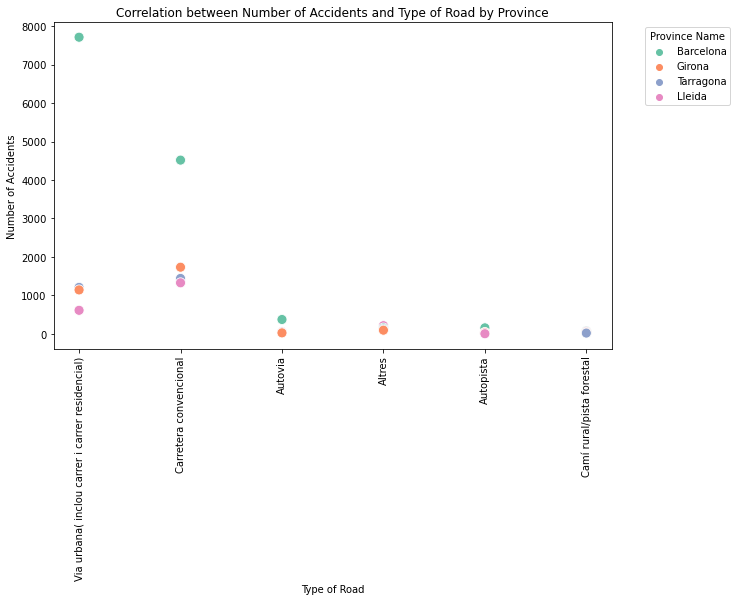

In [29]:

municipalities_roads = geographical_data.groupby(['Municipality Name ', 'Type of Road']).size().reset_index(name='Accidents')
counties_roads = geographical_data.groupby(['County Name ', 'Type of Road']).size().reset_index(name='Accidents')
province_roads = geographical_data.groupby(['Province Name ', 'Type of Road']).size().reset_index(name='Accidents')

municipalities_roads.sort_values(by='Accidents', ascending=False, inplace=True)
counties_roads.sort_values(by='Accidents', ascending=False, inplace=True)
province_roads.sort_values(by='Accidents', ascending=False, inplace=True)


# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Type of Road', y='Accidents', hue='Province Name ', data=province_roads, palette='Set2', s=100)
plt.title('Correlation between Number of Accidents and Type of Road by Province')
plt.xlabel('Type of Road')
plt.ylabel('Number of Accidents')
plt.legend(title='Province Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis ticks
plt.xticks(rotation=90)

plt.show()


C:\Users\pc\AppData\Local\Temp/ipykernel_10924/1029103088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_trends['Date '] = pd.to_datetime(year_trends['Date '])


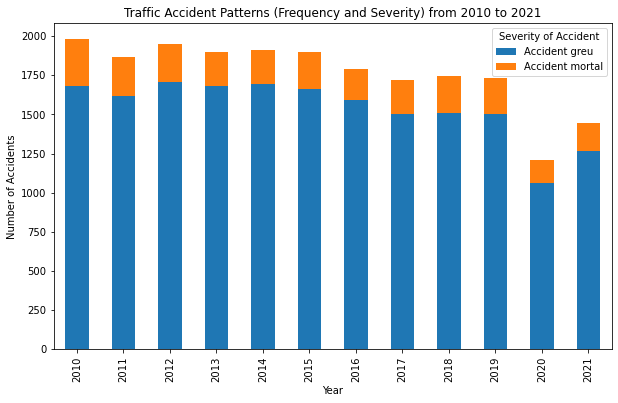

In [114]:
#4. Yearly Trends
#How have traffic accident patterns (frequency, severity) changed yearly from 2010 to 2021?
year_trends = raw_data[['Year','Date ', 'Severity of Accident ']]
year_trends['Date '] = pd.to_datetime(year_trends['Date '])

grouped_trends = year_trends.groupby(['Year', 'Severity of Accident ']).size().unstack(fill_value=0)
# Plotting the stacked bar chart
grouped_trends.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Traffic Accident Patterns (Frequency and Severity) from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity of Accident')
plt.show()

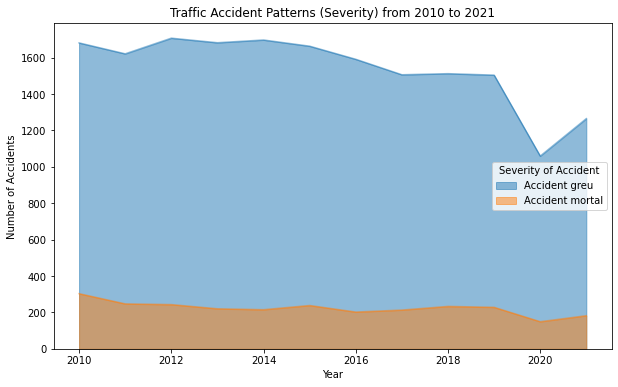

In [117]:
grouped_trends.plot(kind='area', stacked=False, figsize=(10, 6))
plt.title('Traffic Accident Patterns (Severity) from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity of Accident')
plt.show()


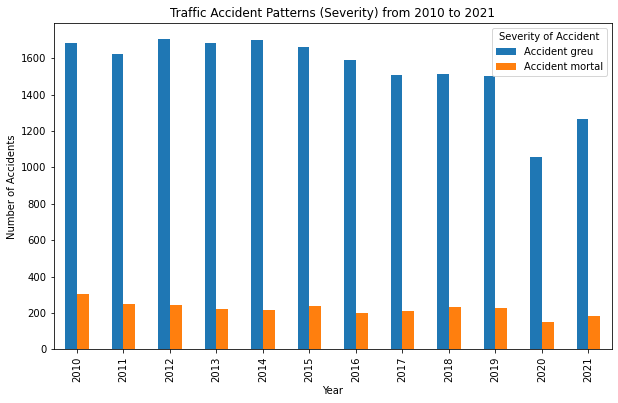

In [118]:
grouped_trends.plot(kind='bar', figsize=(10, 6))
plt.title('Traffic Accident Patterns (Severity) from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity of Accident')
plt.show()


In [36]:
#5. Day and Time Patterns
# On what days of the week and times of day do most accidents occur? Are there notable differences between weekdays and weekends?

columns_severity = ['Date ', 'Day of the Week Grouping ',
 'Hour of Day', 'Time of Day Grouping ', 'Type of Accident ',
 'Day Type']

raw_data['Date '] = pd.to_datetime(raw_data['Date '], format='%d/%m/%Y', dayfirst=True)
time_patterns = raw_data[columns_severity]
time_patterns['Day of Week'] = time_patterns['Date '].dt.day_name()
time_patterns['Month'] = time_patterns['Date '].dt.month_name()

time_patterns.head(5)

C:\Users\pc\AppData\Local\Temp/ipykernel_18044/526329049.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_patterns['Day of Week'] = time_patterns['Date '].dt.day_name()
C:\Users\pc\AppData\Local\Temp/ipykernel_18044/526329049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_patterns['Month'] = time_patterns['Date '].dt.month_name()


,Date,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type,Day of Week,Month
0,2010-01-25,Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij,Monday,January
1,2010-10-31,CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg,Sunday,October
2,2010-05-17,Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij,Monday,May
3,2010-08-21,CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis,Saturday,August
4,2010-05-07,CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div,Friday,May


In [41]:
days = time_patterns.groupby('Day of Week').size().reset_index(name='Accidents')
time = time_patterns.groupby('Hour of Day').size().reset_index(name='Accidents')
time_group = time_patterns.groupby('Time of Day Grouping ').size().reset_index(name='Accidents')
month = time_patterns.groupby('Month').size().reset_index(name='Accidents')

time_order = ['Matí', 'Tarda', 'Nit']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

time_group['Time of Day Grouping '] = pd.Categorical(time_group['Time of Day Grouping '], categories=time_order, ordered=True)
time_group.sort_values(by='Time of Day Grouping ', inplace=True)

days['Day of Week'] = pd.Categorical(days['Day of Week'], categories=day_order, ordered=True)
days.sort_values(by='Day of Week', inplace=True)

month['Month'] = pd.Categorical(month['Month'], categories=month_order, ordered=True)
month.sort_values(by='Month', inplace=True)

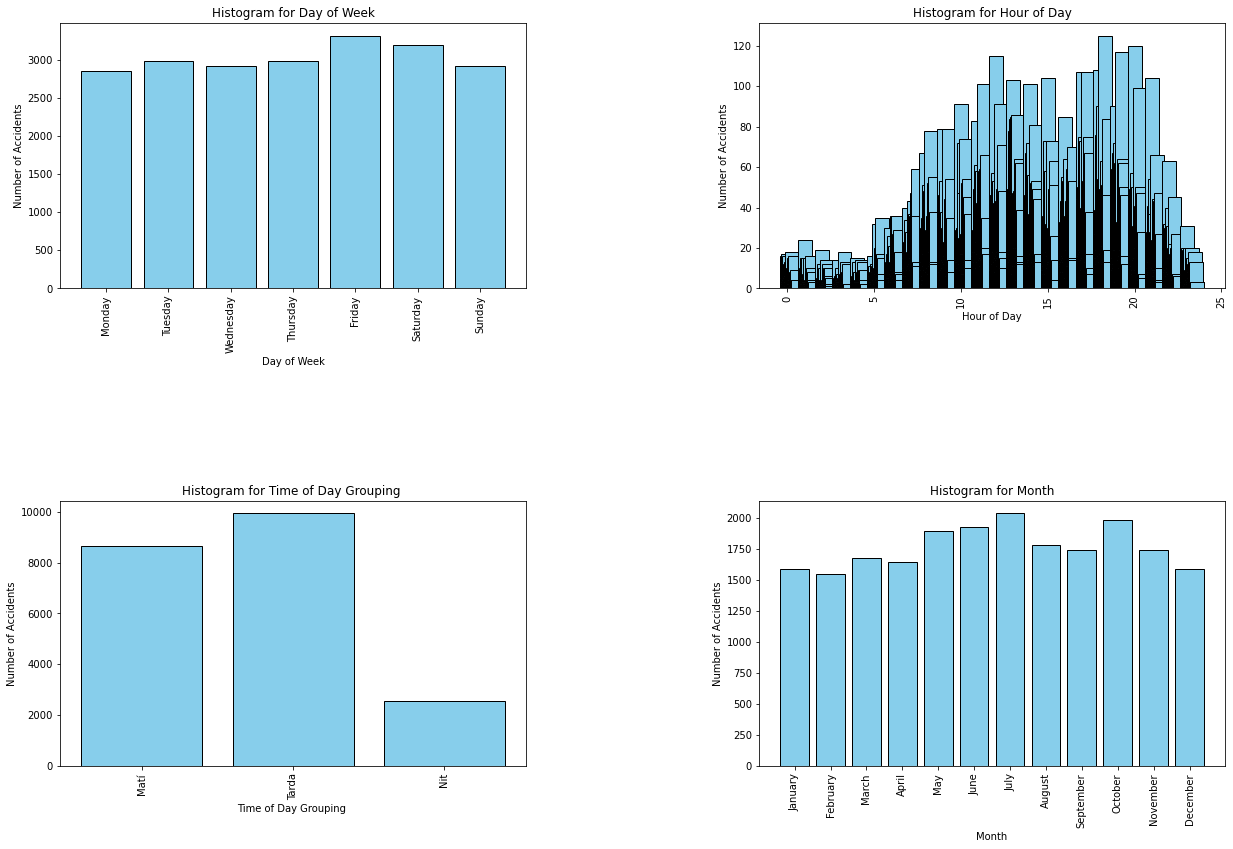

In [60]:
time_patterns_datasets = [days, time, time_group, month]

column_names = ['Day of Week', 'Hour of Day', 'Time of Day Grouping ', 'Month']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.tight_layout(pad=5.0)

# Loop through datasets and column names to create histograms
for ax, dataset, column_name in zip(axes.flatten(), time_patterns_datasets, column_names):
    # Convert 'Month' to a categorical data type with the custom order

    # Plotting histogram
    ax.bar(dataset[column_name], dataset['Accidents'], color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Number of Accidents')

    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()


In [74]:
#6. Environmental Impact
# How do different weather conditions affect the likelihood of accidents? 
# Is there a correlation between visibility, road conditions, and accident severity?

enviromental_col = ['Weather Conditions ', 'Severity of Accident ',
                    'Influence of Fog ', 'Influence of Environment','Influence of Wind Intensity ',
                    'Influence of Lighting','Influence of Road Objects', 'Influence of Road Surface ',
                    'Influence of Visibility ','Lighting Conditions ','Wind Conditions ']

enviromental_data = raw_data[enviromental_col]

weather = enviromental_data.groupby(['Weather Conditions ', 'Severity of Accident ']).size().reset_index(name='Accidents')
fog = enviromental_data.groupby(['Influence of Fog ', 'Severity of Accident ']).size().reset_index(name='Accidents')
enviroment_influence = enviromental_data.groupby(['Influence of Environment', 'Severity of Accident ']).size().reset_index(name='Accidents')
wind = enviromental_data.groupby(['Influence of Wind Intensity ', 'Severity of Accident ']).size().reset_index(name='Accidents')
lightning = enviromental_data.groupby(['Influence of Lighting', 'Severity of Accident ']).size().reset_index(name='Accidents')
objects = enviromental_data.groupby(['Influence of Road Objects', 'Severity of Accident ']).size().reset_index(name='Accidents')
surface = enviromental_data.groupby(['Influence of Road Surface ', 'Severity of Accident ']).size().reset_index(name='Accidents')
visibility = enviromental_data.groupby(['Influence of Visibility ', 'Severity of Accident ']).size().reset_index(name='Accidents')
light_conditions = enviromental_data.groupby(['Lighting Conditions ', 'Severity of Accident ']).size().reset_index(name='Accidents')
wind_conditions = enviromental_data.groupby(['Wind Conditions ', 'Severity of Accident ']).size().reset_index(name='Accidents')

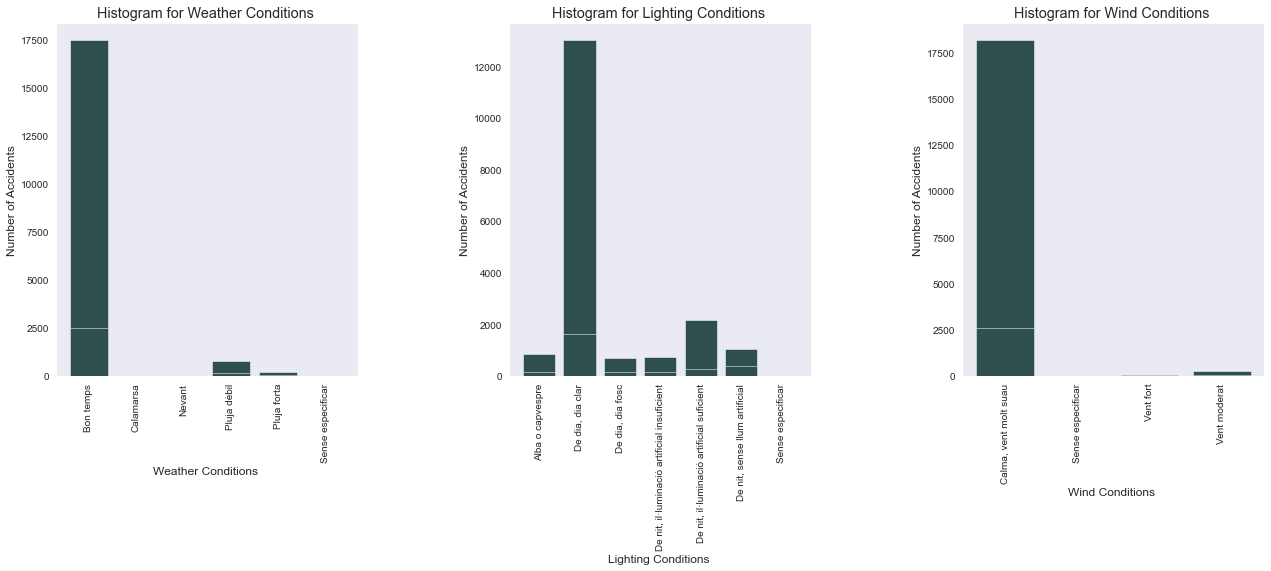

In [112]:
conditions = [weather, light_conditions, wind_conditions]

conditions_names = ['Weather Conditions ', 'Lighting Conditions ','Wind Conditions ']


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.tight_layout(pad=3.0)

# Loop through datasets and column names to create histograms
for ax, dataset, column_name in zip(axes.flatten(), conditions, conditions_names):
    # Convert 'Month' to a categorical data type with the custom order
    sns.set_style("dark")
    # Plotting histogram
    ax.bar(dataset[column_name], dataset['Accidents'], color='darkslategrey')
    ax.set_title(f'Histogram for {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Number of Accidents')

    plt.setp(ax.get_xticklabels(), rotation=90)
# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

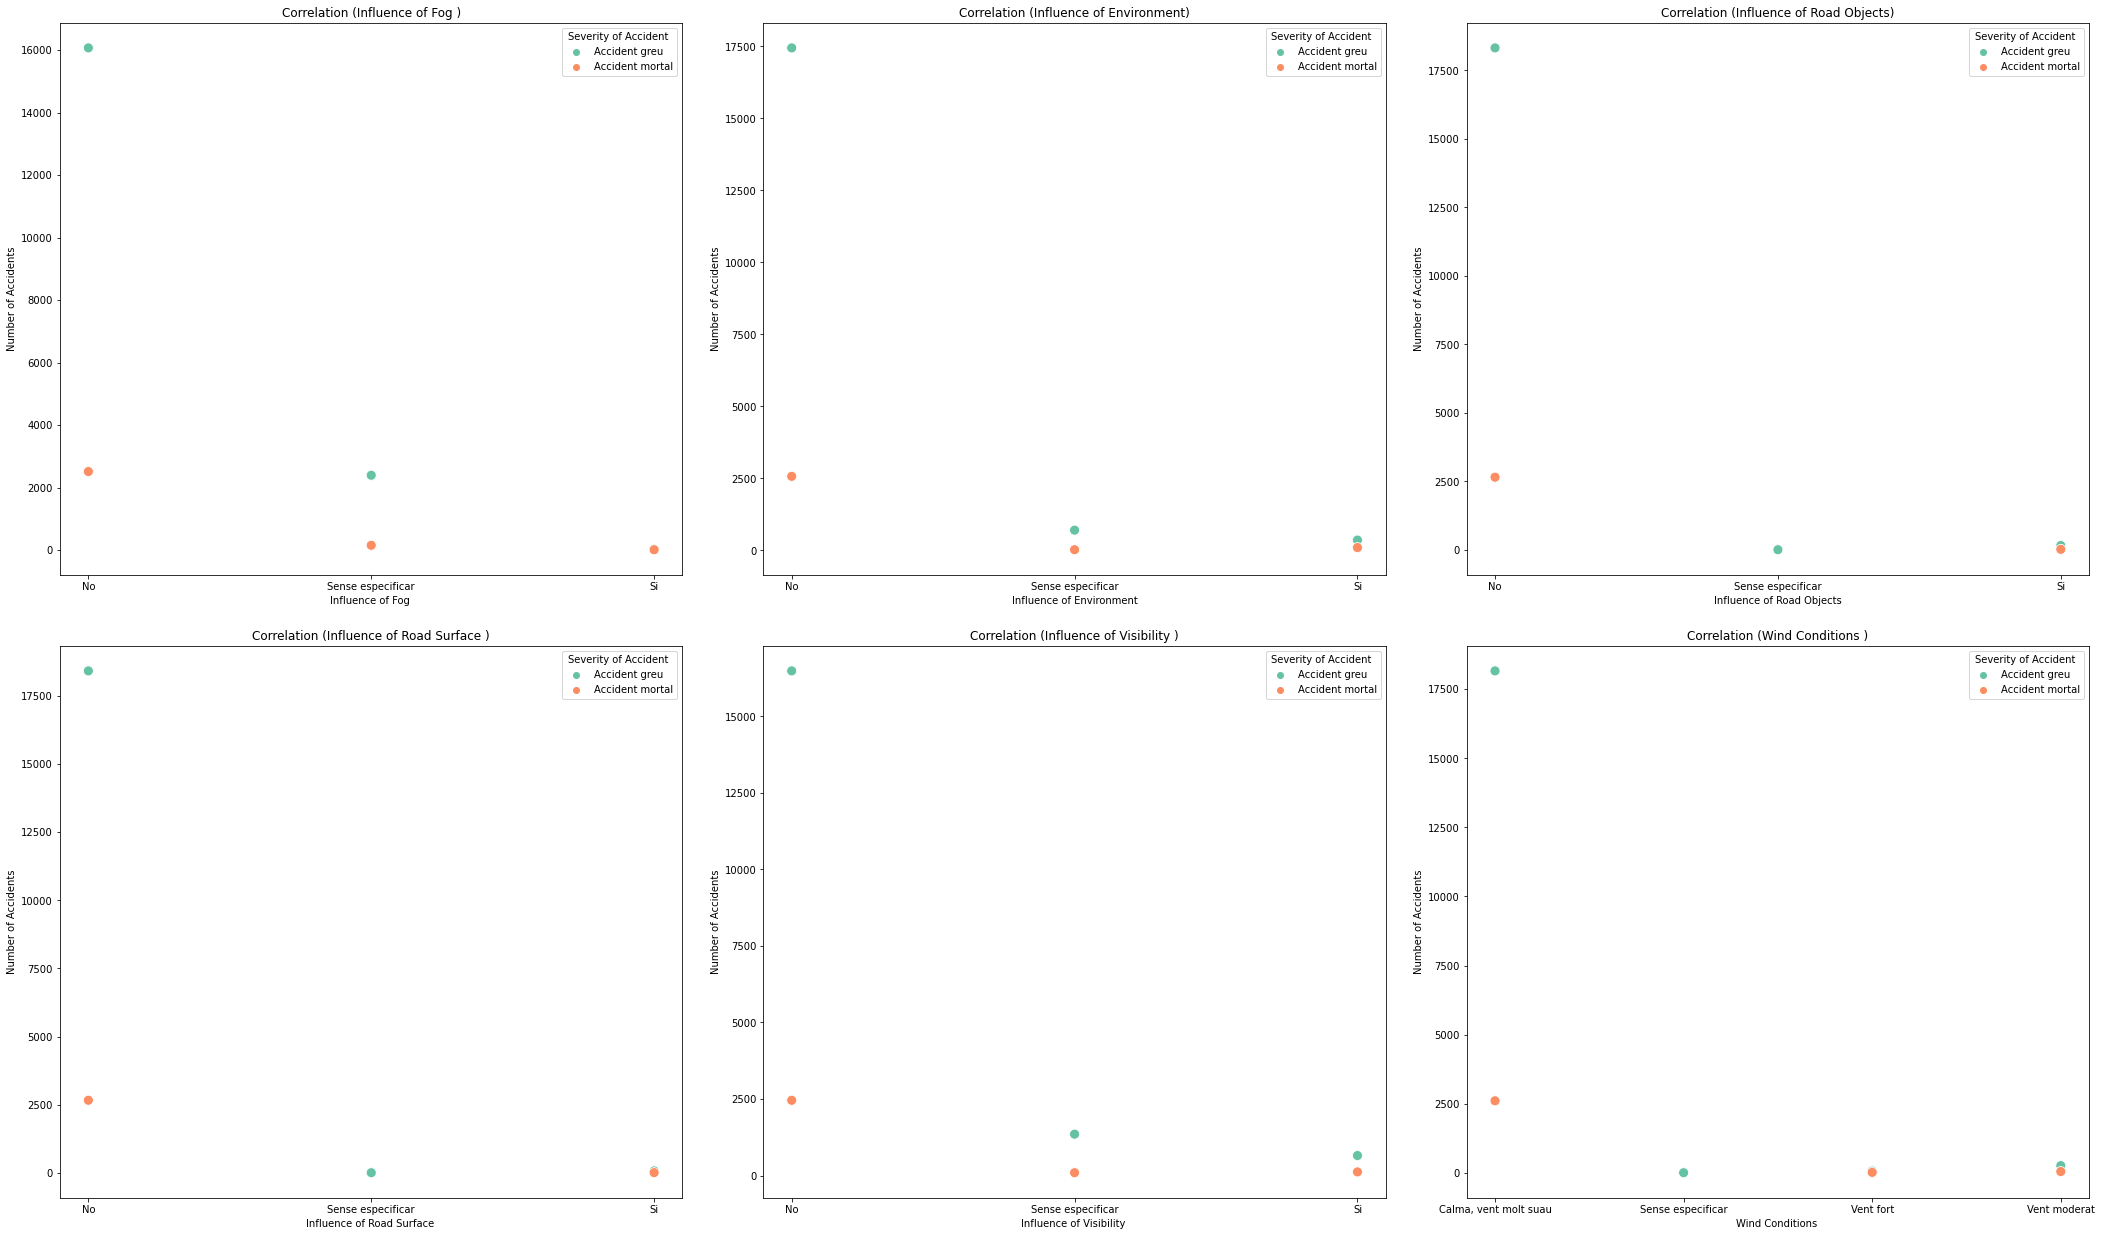

In [92]:
enviromental_datasets = [fog, enviroment_influence, objects,
                        surface, visibility, wind_conditions]

enviromental_names = ['Influence of Fog ', 'Influence of Environment', 'Influence of Road Objects',
                      'Influence of Road Surface ', 'Influence of Visibility ','Wind Conditions ']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 18))
fig.tight_layout(pad=5.0)

# If axes is a 2D array, flatten it to 1D
axes = axes.flatten()

# Loop through datasets and dataset names to create scatter plots
for ax, dataset, dataset_name, x_var_name in zip(axes, enviromental_datasets, enviromental_names, enviromental_names):
    # Plotting the scatter plot
    sns.scatterplot(x=x_var_name, y='Accidents', data=dataset, ax=ax, hue='Severity of Accident ', palette='Set2', s=100)
    ax.set_title(f'Correlation ({dataset_name})')
    ax.set_xlabel(x_var_name)
    ax.set_ylabel('Number of Accidents')

# Show the plot
plt.show()


In [125]:
#7.  Road and Traffic Features
#What impact do road features (such as speed limits and road types) and traffic density have on the occurrence of accidents?


features_cols = ['Road Speed Limit', 'Influence of Traffic', 'Type of Road']

featrues_data = raw_data[features_cols]

speed = featrues_data.groupby('Road Speed Limit').size().reset_index(name='Accidents')
traffic = featrues_data.groupby('Influence of Traffic').size().reset_index(name='Accidents')
road = featrues_data.groupby('Type of Road').size().reset_index(name='Accidents')


In [127]:
# Since in catalonia there is no type of road where speed is unlimited we will not consider 999 km/h events
speed = speed[speed['Road Speed Limit'] < 999]
speed

,Road Speed Limit,Accidents
0,0.0,4
1,10.0,19
2,15.0,1
3,20.0,129
4,30.0,878
5,40.0,1072
6,45.0,2
7,50.0,1044
8,60.0,613
9,70.0,309


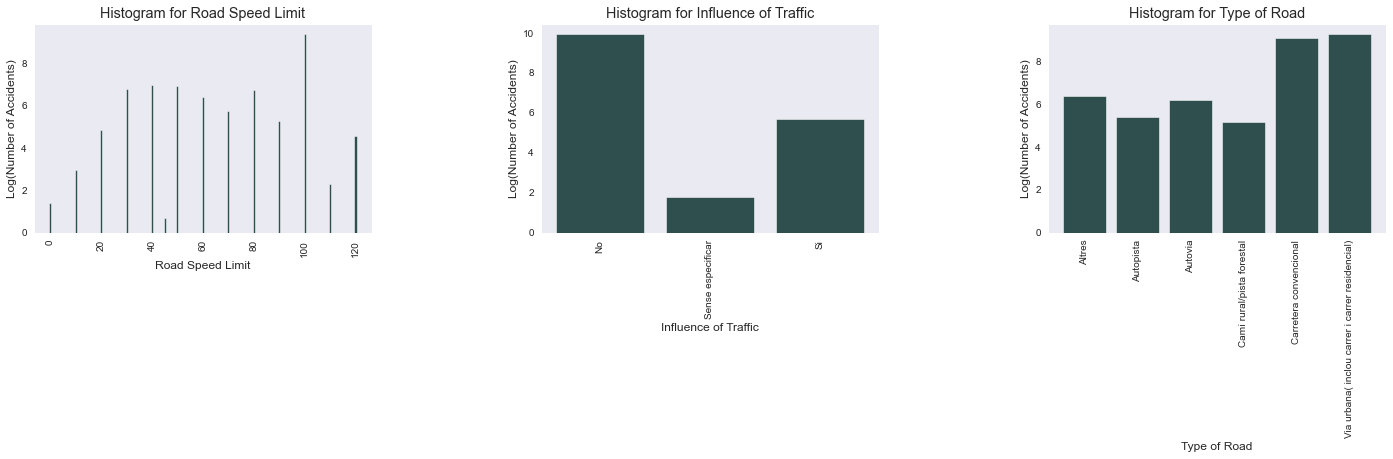

In [136]:
features_datasets = [speed, traffic, road]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
fig.tight_layout(pad=3.0)

# Loop through datasets and column names to create histograms
for ax, dataset, column_name in zip(axes.flatten(), features_datasets, features_cols):
    # Convert 'Month' to a categorical data type with the custom order
    sns.set_style("dark")
    # Plotting histogram
    ax.bar(dataset[column_name], np.log(dataset['Accidents']), color='darkslategrey')
    ax.set_title(f'Histogram for {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Log(Number of Accidents)')

    plt.setp(ax.get_xticklabels(), rotation=90)
# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

In [104]:
#8. Vehicle Types and Accident Severity
#Does the involvement of specific types of vehicles (like heavy trucks and motorcycles) correlate with more severe accidents?

In [140]:
vehicle_columns = ['Pedestrains Involved', 'Bicycles Involved', 'Mopeds Involved', 'Motorcycles', 
                   'Light Vehicles Involved ', 'Heavy Vehicles Involved', 'Severity of Accident ']

vehicle_data = raw_data[vehicle_columns]


In [143]:
pedestrians = vehicle_data.groupby(['Pedestrains Involved', 'Severity of Accident ']).size().reset_index(name='Accidents')
bicycles = vehicle_data.groupby(['Bicycles Involved', 'Severity of Accident ']).size().reset_index(name='Accidents')
mopeds = vehicle_data.groupby(['Mopeds Involved', 'Severity of Accident ']).size().reset_index(name='Accidents')
motorcycles = vehicle_data.groupby(['Motorcycles', 'Severity of Accident ']).size().reset_index(name='Accidents')
light_v = vehicle_data.groupby(['Light Vehicles Involved ', 'Severity of Accident ']).size().reset_index(name='Accidents')
heavy_v = vehicle_data.groupby(['Heavy Vehicles Involved', 'Severity of Accident ']).size().reset_index(name='Accidents')


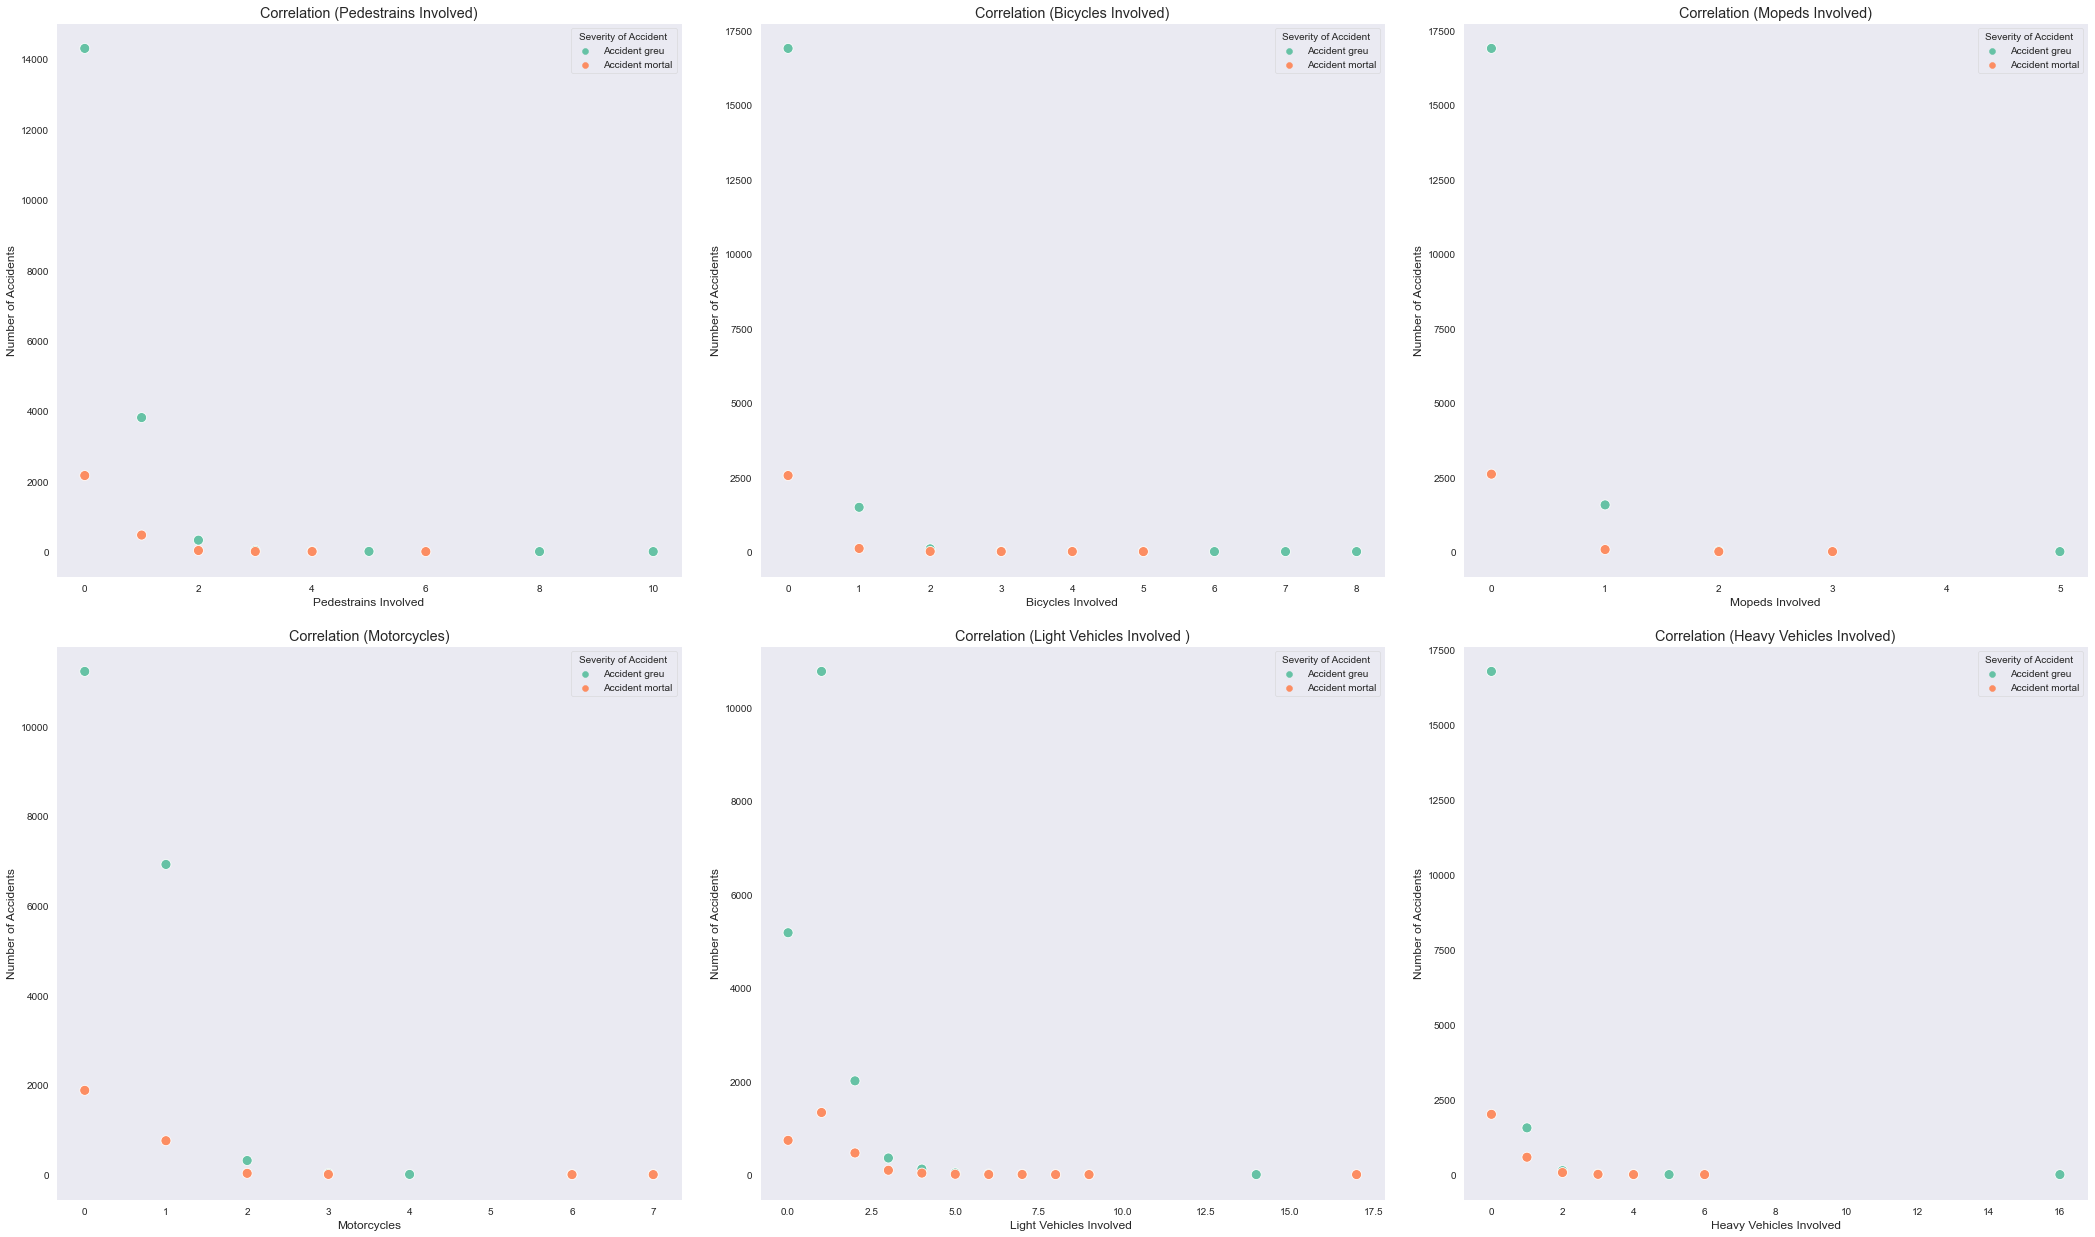

In [145]:
vehicles_datasets = [pedestrians, bicycles, mopeds,
                        motorcycles, light_v, heavy_v]

vehicles_names = ['Pedestrains Involved', 'Bicycles Involved', 'Mopeds Involved', 'Motorcycles', 
                   'Light Vehicles Involved ', 'Heavy Vehicles Involved']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 18))
fig.tight_layout(pad=5.0)

# If axes is a 2D array, flatten it to 1D
axes = axes.flatten()

# Loop through datasets and dataset names to create scatter plots
for ax, dataset, dataset_name, x_var_name in zip(axes, vehicles_datasets, vehicles_names, vehicles_names):
    # Plotting the scatter plot
    sns.scatterplot(x=x_var_name, y='Accidents', data=dataset, ax=ax, hue='Severity of Accident ', palette='Set2', s=100)
    ax.set_title(f'Correlation ({dataset_name})')
    ax.set_xlabel(x_var_name)
    ax.set_ylabel('Number of Accidents')

# Show the plot
plt.show()


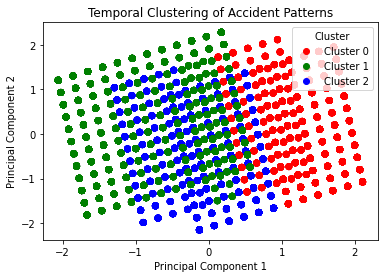

In [13]:
#9. Temporal Clustering
#Are there specific periods (months, years) where accident patterns cluster significantly? What might be the causes for these clusters?
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
# Assuming you have a DataFrame named 'df' with the specified columns
temporal_columns = ['Year', 'Date ', 'Time of Day Grouping ']

# Extract relevant columns
temporal_data = raw_data[temporal_columns]
le = LabelEncoder()
temporal_data['Time of Day Grouping '] = le.fit_transform(temporal_data['Time of Day Grouping '])

# Convert 'Date' to datetime type
temporal_data['Date '] = pd.to_datetime(temporal_data['Date '])

# Extract features from the date (e.g., month and day)
temporal_data['Month'] = temporal_data['Date '].dt.month

# Drop the original 'Date' column
temporal_data = temporal_data.drop('Date ', axis=1)

# Standardize the features
scaler = StandardScaler()
temporal_data_scaled = scaler.fit_transform(temporal_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=123)
temporal_data['Cluster'] = kmeans.fit_predict(temporal_data_scaled)


# Principal Component Analysis (PCA) for visualization
pca = PCA(n_components=3)
temporal_data_pca = pca.fit_transform(temporal_data_scaled)


# Define custom colormap for clusters
cluster_colors = ['red', 'green', 'blue']
cmap = ListedColormap(cluster_colors)

# Plot clusters in 2D space using PCA
scatter = plt.scatter(temporal_data_pca[:, 0], temporal_data_pca[:, 1], c=temporal_data['Cluster'], cmap=cmap)
plt.title('Temporal Clustering of Accident Patterns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend with custom colors
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(len(cluster_colors))], title='Cluster', loc='upper right')

plt.show()


In [14]:
# Check the counts of data points in each cluster
cluster_counts = temporal_data['Cluster'].value_counts()

# Display the counts
print(cluster_counts)

1    9083
2    6538
0    5540
Name: Cluster, dtype: int64


In [15]:
days = temporal_data[temporal_data['Cluster'] == 1]['Time of Day Grouping ']
le.inverse_transform(days.unique())

array(['Matí', 'Nit'], dtype=object)

In [17]:
#10. Time-Series Forecasting
forecast_col = ['Date ', 'Fatalties', 'Serious Injuries ',
                 'Light Injuries ', 'Total Victims ']

forecast_data = raw_data[forecast_col]
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21161 entries, 0 to 21160
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               21161 non-null  object
 1   Fatalties          21161 non-null  int64 
 2   Serious Injuries   21161 non-null  int64 
 3   Light Injuries     21161 non-null  int64 
 4   Total Victims      21161 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 826.7+ KB


Based on past trends, create a model to forecast the number of accidents, fatalities, or serious injuries for the upcoming year.

Clearly describe the forecasting model you have developed. This should include the type of model, its structure, and any specific features or techniques it utilizes. Discuss the factors that influenced your decision, such as the model’s accuracy, efficiency, suitability to the data characteristics, or its ability to handle the complexities of the dataset.


In [9]:
#!pip install xgboost


In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_predict
from sklearn.metrics import mean_squared_error




# Feature Engineering
forecast_data['Date '] = pd.to_datetime(forecast_data['Date '])
forecast_data['day_of_week'] = forecast_data['Date '].dt.dayofweek
forecast_data['month'] = forecast_data['Date '].dt.month
# Add other relevant time-related features as needed

# Data Formatting
df_xgboost = forecast_data[['Date ', 'Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims ']].copy()
df_xgboost.columns = ['ds', 'fatalities', 'serious_injuries', 'light_injuries', 'y']

# Extract time-related features
df_xgboost['day_of_week'] = df_xgboost['ds'].dt.dayofweek
df_xgboost['month'] = df_xgboost['ds'].dt.month

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)  # Choose the number of splits as needed


# Train-Test Split for Time Series Data
train_size = int(len(df_xgboost) * 0.8)
train, test = df_xgboost[:train_size], df_xgboost[train_size:]

# Model Training with Cross-Validation
X_train, y_train = train[['fatalities', 'serious_injuries', 'light_injuries', 'day_of_week', 'month']], train['y']
X_test, y_test = test[['fatalities', 'serious_injuries', 'light_injuries', 'day_of_week', 'month']], test['y']

# Specify XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 50,
    'alpha': 10,
    'n_estimators': 500
}

# Instantiate XGBoost model
model = XGBRegressor(**xgb_params)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0022555626123526183


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_predict
from sklearn.metrics import mean_squared_error




# Feature Engineering
forecast_data['Date '] = pd.to_datetime(forecast_data['Date '])
forecast_data['day_of_week'] = forecast_data['Date '].dt.dayofweek
forecast_data['month'] = forecast_data['Date '].dt.month
# Add other relevant time-related features as needed

# Data Formatting
df_xgboost = forecast_data[['Date ', 'Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims ']].copy()
df_xgboost.columns = ['ds', 'fatalities', 'serious_injuries', 'light_injuries', 'y']

# Extract time-related features
df_xgboost['day_of_week'] = df_xgboost['ds'].dt.dayofweek
df_xgboost['month'] = df_xgboost['ds'].dt.month

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)  # Choose the number of splits as needed


# Train-Test Split for Time Series Data
train_size = int(len(df_xgboost) * 0.8)
train, test = df_xgboost[:train_size], df_xgboost[train_size:]

# Model Training with Cross-Validation
X_train, y_train = train[['fatalities', 'serious_injuries', 'light_injuries', 'day_of_week', 'month']], train['y']
X_test, y_test = test[['fatalities', 'serious_injuries', 'light_injuries', 'day_of_week', 'month']], test['y']

# Specify XGBoost parameters
rf_params = {
    'criterion': 'squared_error',
    'max_depth': 25,
    'ccp_alpha': 0.5,
    'n_estimators': 1000
}

# Instantiate XGBoost model
model = RandomForestRegressor(**rf_params)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.4814166962306155


,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
6713,2016,Carretera,20/03/2016,AP-7,333.2,FREGINALS,Montsia,Tarragona,13,23,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,5.55,Nit,Sortida de la calcada sense especificar,dg


20:34:09 - cmdstanpy - INFO - Chain [1] start processing
20:34:09 - cmdstanpy - INFO - Chain [1] done processing


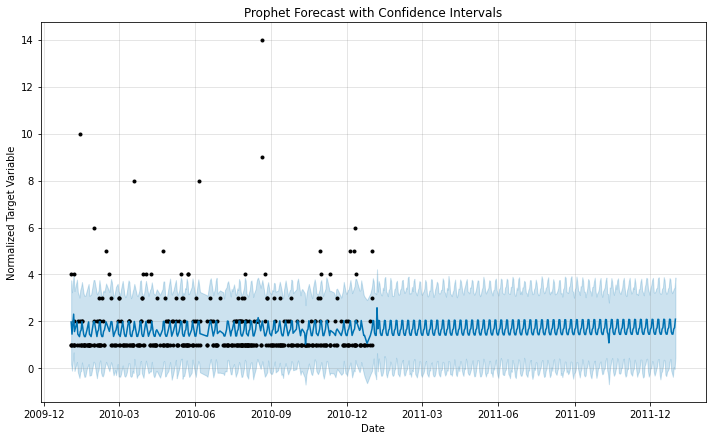

Mean Squared Error (Prophet): 0.000464243027333409


In [64]:
from prophet import Prophet

# Assuming 'df' is your DataFrame with the relevant columns
df_prophet = forecast_data[['Date ', 'Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims ']].copy()
df_prophet.columns = ['ds', 'fatalities', 'serious_injuries', 'light_injuries', 'y']


# Normalize the target variable 'y'
max_y = df_prophet['y'].max()
df_prophet['y_normalized'] = df_prophet['y'] / max_y

holidays_df = pd.DataFrame({
    'holiday': '2020_covid_effect',
    'ds': df_prophet[df_prophet['ds'].dt.year == 2020]['ds'],
    'lower_window': 0,
    'upper_window': 1,
    'weight': 0.5  # Adjust the weight as needed
})
 # Adjust the weight as needed

df_prophet['ds'].sort_values(ascending=True)
# Split the data into a training set and a test set
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet[:365], df_prophet[len(df_prophet)-365:]

# Instantiate Prophet model
model_prophet = Prophet(holidays=holidays_df)
model_prophet.add_country_holidays(country_name='ES')

# Fit the model on the training set with weights
model_prophet.fit(train)

# Create a future DataFrame for predictions (including both training and test periods)
future = model_prophet.make_future_dataframe(periods=365)
# Generate forecast
forecast = model_prophet.predict(future)

# Plot the forecast with confidence intervals
fig = model_prophet.plot(forecast, xlabel='Date', ylabel='Normalized Target Variable', figsize=(10, 6))
plt.title('Prophet Forecast with Confidence Intervals')

# Display the plot
plt.show()

# Performance metric on the test set
y_true = test['y_normalized']
y_pred = forecast['yhat'][-len(test):] / max_y  # Extract the forecast for the test set and denormalize
mse_prophet = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (Prophet): {mse_prophet}')


In [61]:
df_prophet[:365]

,ds,fatalities,serious_injuries,light_injuries,y,y_normalized
0,2010-01-25,0,1,0,1,0.020408
1,2010-10-31,0,1,3,4,0.081633
2,2010-05-17,1,0,2,3,0.061224
3,2010-08-21,0,2,7,9,0.183673
4,2010-07-05,0,1,0,1,0.020408
...,...,...,...,...,...,...
360,2010-03-31,0,1,3,4,0.081633
361,2010-02-10,0,1,1,2,0.040816
362,2010-02-12,1,0,0,1,0.020408
363,2010-01-25,0,1,0,1,0.020408


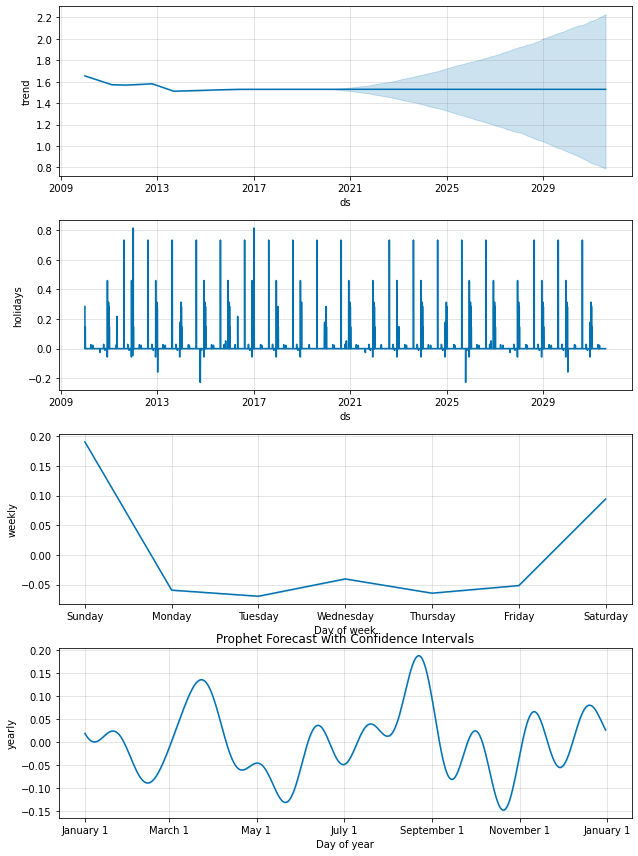

In [53]:


# Plot the forecast with confidence intervals
fig = model_prophet.plot_components(forecast)
plt.title('Prophet Forecast with Confidence Intervals')


# Display the plot
plt.show()

